In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import os


In [2]:

parent = 'results_publication2/tcrdist_optimisation'
results = pd.concat([pd.read_csv(os.path.join(parent, file,'total.csv'), index_col=0) for file in os.listdir(parent) if os.path.isdir(os.path.join(parent, file))])


results['Runtime']=results['Runtime'].apply(literal_eval).apply(lambda x: sum(x) if type(x)==list else x)

/Users/danhudson/Documents/Academic/Oxford/Oxford_DPhil/DPhil/Software/ClustOx


/var/folders/pp/qphvqyn14wl91lgf7368sfmw0000gn/T/ipykernel_2790/2132609865.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['tcrdist_Hyper']=sub['tcrdist_Hyper'].astype(int)


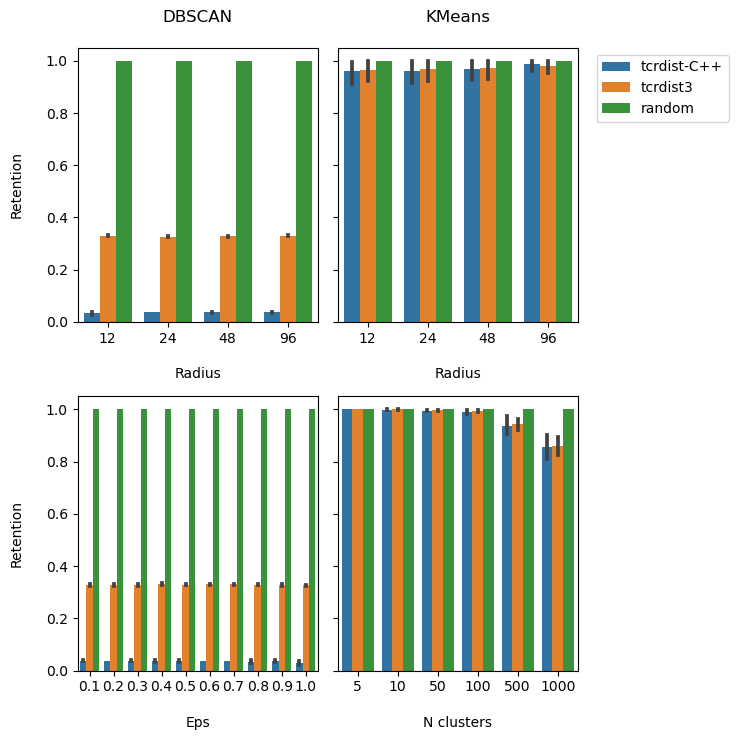

/var/folders/pp/qphvqyn14wl91lgf7368sfmw0000gn/T/ipykernel_2790/2132609865.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['tcrdist_Hyper']=sub['tcrdist_Hyper'].astype(int)


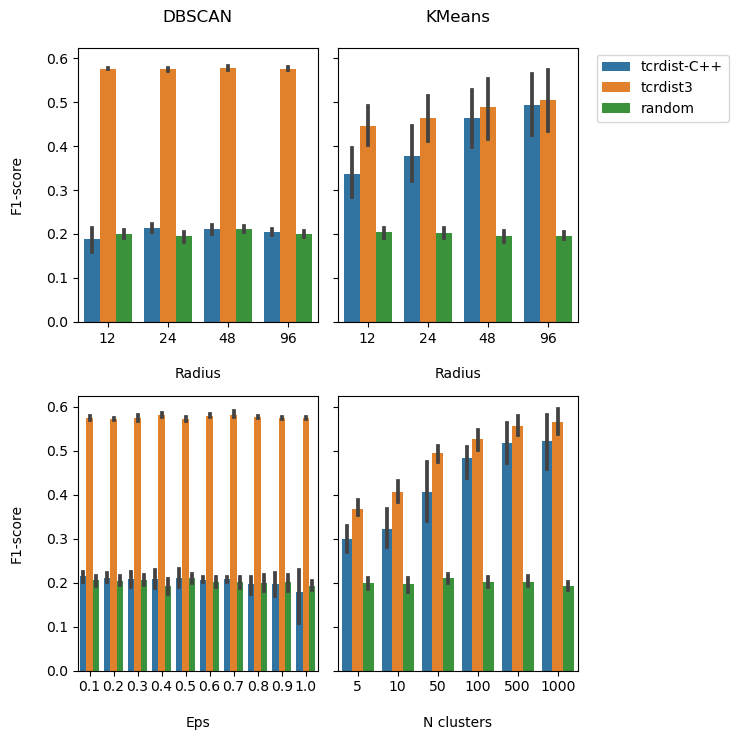

/var/folders/pp/qphvqyn14wl91lgf7368sfmw0000gn/T/ipykernel_2790/2132609865.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['tcrdist_Hyper']=sub['tcrdist_Hyper'].astype(int)


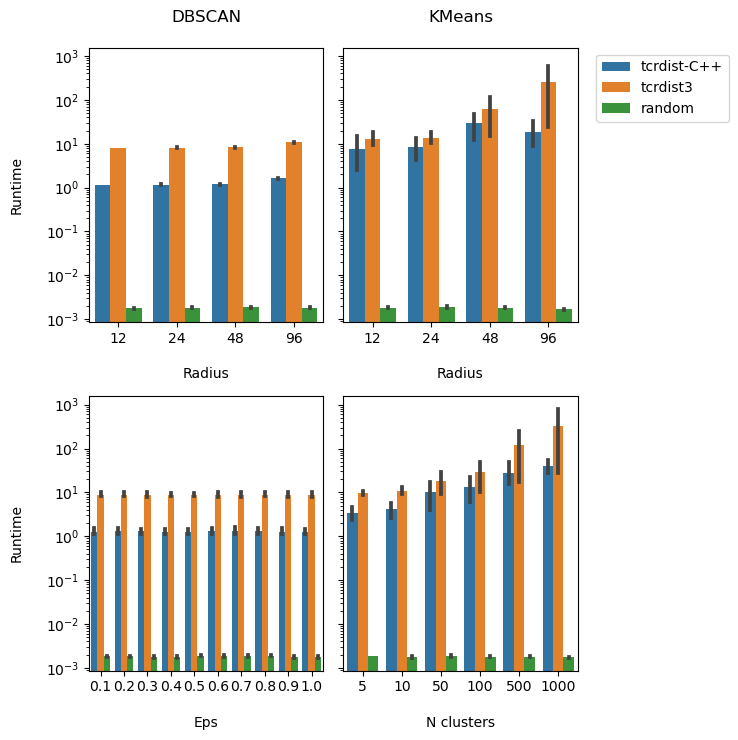

In [10]:


names = ['DBSCAN', 
         'KMeans']

# results['N_clusters']=results['N_clusters'].astype(int).astype(str)
hue_order = ['tcrdist-C++', 'tcrdist3','random']

results['Model']=results['Model'].replace({'tcrdist': 'tcrdist-C++'})

for metric in ['retention', 
               'f1-score',
               'Runtime']:
    fig, ax = plt.subplots(2, 2, 
                           figsize = (7.5,7.5),
                           sharey=True)
    for m, model in enumerate(results['tcrdist_Method'].unique()):
        sub = results[results['tcrdist_Method']==model]
        
        if model =='DBSCAN':
            sub=sub[sub['tcrdist_Hyper']<=1]
        else:
            sub['tcrdist_Hyper']=sub['tcrdist_Hyper'].astype(int)
        sns.barplot(data= sub, 
                    x = 'tcrdist_Radius',
                    y= metric,
                    hue = 'Model',
                    hue_order=hue_order,
                    ax=ax[0][m])
        ax[0][m].set_title('%s\n'%(names[m]))
        sns.barplot(data= sub, 
                    x = 'tcrdist_Hyper',
                    y= metric,
                    hue = 'Model',
                    hue_order=hue_order,
                    ax=ax[1][m])
        # ax[1][m].set_title(model)
        for i in [0, 1]:
            if (m ==1)&(i==0):
                ax[i][m].legend(loc=2, bbox_to_anchor=(1.05, 1))
            else:
                ax[i][m].legend([],[], frameon=False)
            if m ==0:
                ax[i][m].set_ylabel('%s\n'%(metric.capitalize()))
                
            else:
                ax[i][m].set_ylabel(None)
            if i==0:
                ax[i][m].set_xlabel('\nRadius')
            else:
                ax[i][0].set_xlabel('\nEps')
                ax[i][1].set_xlabel('\nN clusters')
    if metric =='Runtime':
        plt.yscale('log')
    fig.tight_layout()
    plt.show()

    

In [16]:
import numpy as np
parent = 'results_publication2/tcrdist_oom'
results = pd.concat([pd.read_csv(os.path.join(parent, file,'total.csv'), index_col=0) for file in os.listdir(parent) if os.path.isdir(os.path.join(parent, file))])
results['Runtime']=results['Runtime'].apply(literal_eval).apply(lambda x: sum(x) if type(x)==list else x)

sub = results[(results['Datetime'].isin(['20231018_115752',
                                         '20231018_120945']))]
sub['tcrdist_Chunk']=sub['tcrdist_Chunk'].replace({True: 'Chunk',
                                                   np.nan: 'No-Chunk'})
sub['model_chunk']=[x[0]+'-'+x[1] if x[0]=='tcrdist3' else 'random' for x in zip(sub['Model'], sub['tcrdist_Chunk'])]

/var/folders/pp/qphvqyn14wl91lgf7368sfmw0000gn/T/ipykernel_2790/3841104168.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['tcrdist_Chunk']=sub['tcrdist_Chunk'].replace({True: 'Chunk',
/var/folders/pp/qphvqyn14wl91lgf7368sfmw0000gn/T/ipykernel_2790/3841104168.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['model_chunk']=[x[0]+'-'+x[1] if x[0]=='tcrdist3' else 'random' for x in zip(sub['Model'], sub['tcrdist_Chunk'])]


In [63]:
sub.to_csv(os.path.join(parent, 'results.csv'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


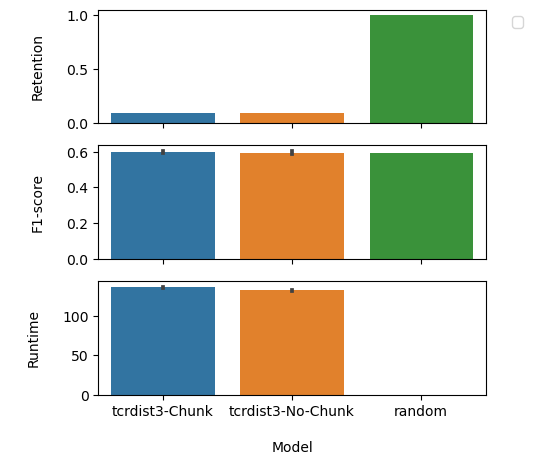

In [21]:
order = ['tcrdist3-Chunk', 'tcrdist3-No-Chunk', 'random']
fig, ax = plt.subplots(3,1, figsize = (5, 5), sharex=True)
for m, metric in enumerate(['retention',
               'f1-score',
               'Runtime']):
    sns.barplot(sub, x = 'model_chunk', y=metric, order=order,ax = ax[m])
    if m==0:
        ax[m].legend(loc=2,bbox_to_anchor=(1.05, 1))
    else:
        ax[m].legend([], [], frameon = False)
    if m ==2:
        ax[m].set_xlabel('\nModel')
    else:
        ax[m].set_xlabel(None)
    ax[m].set_ylabel('\n%s\n'%(metric.capitalize()))
    # ax[m].set_title('\n%s\n'%(metric.capitalize()))

plt.show()

In [115]:
parent = 'results_publication2/benchmark_full'
results = pd.concat([pd.read_csv(os.path.join(parent, file,'total.csv'), index_col=0) for file in os.listdir(parent) if os.path.isdir(os.path.join(parent, file))])
results['Runtime']=results['Runtime'].apply(literal_eval).apply(lambda x: sum(x) if type(x)==list else x)

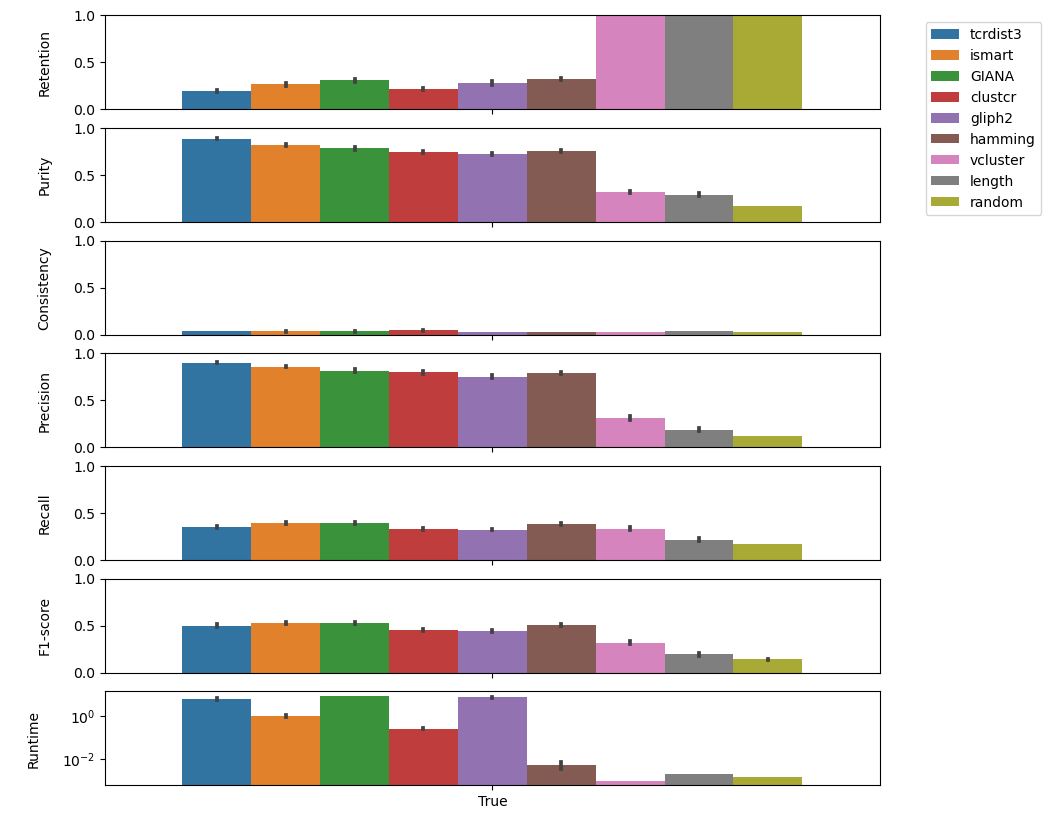

In [116]:

sub=results[results['Experiment']=='Full benchmarking - tcrdist subset']
hue_order = sub.sort_values('precision',ascending=False)['Model'].unique()
metrics = ['retention',
            'purity',
            'consistency',
            'precision',
            'recall',
            'f1-score',
            'Runtime']

fig, ax = plt.subplots(len(metrics),1, figsize = (10, 10), sharex=True)

for m, metric in enumerate(metrics):
    sns.barplot(sub, x = 'tcrdist_Chunk', y=metric, hue = 'Model',hue_order=hue_order, ax = ax[m])
    if m==0:
        ax[m].legend(loc=2,bbox_to_anchor=(1.05, 1))
    else:
        ax[m].legend([], [], frameon = False)
    if m ==2:
        ax[m].set_xlabel('\nOOM mode enabled')
    else:
        ax[m].set_xlabel(None)
    ax[m].set_ylabel('\n%s\n'%(metric.capitalize()))
    # ax[m].set_title('\n%s\n'%(metric.capitalize()))
    if metric == 'Runtime':
        ax[m].set_yscale('log')
    else:
        ax[m].set_ylim(0,1)

plt.show()

In [40]:


def epresults(input_str):
    res = [str(x+'}}') for x in input_str.split('}') if x!='']
    out=[]
    for r in res:
        if r[0]==',':
            r='{'+r[2:]
            if r[-2:]!='}}':
                r=r+'}'
        out.append(literal_eval(r.replace('nan', '0')))
    odict ={}
    for o in out:
        key = list(o.keys())[0]
        val = o[key]
        odict[key]=val
    return odict


def extract_eps(df):
  out=pd.DataFrame()
  for i in range(len(df)):
      epscores = pd.DataFrame.from_dict(df['epscores'].iloc[i]).reset_index().rename(columns={'index':'epitope'})
      header = pd.DataFrame([[df.iloc[i][col]]*len(epscores) for col in ['Datetime',
                                                                          'Model', 
                                                                          'Downsample', 
                                                                          'Chain',
                                                                          'N_olga']]).T.rename(columns={0: 'Datetime',
                                                                                                        1: 'Model',
                                                                                                          2: 'Downsample',
                                                                                                          3: 'Chain',
                                                                                                          4: 'N_olga'})
      o_df  =pd.concat([header, epscores],axis=1)
      out=pd.concat([out, o_df])
  return out


In [83]:
results['Experiment'].unique()

array(['Full benchmarking - tcrdist subset'], dtype=object)

In [85]:
results['epscores']=results['epscores'].apply(epresults)
eps = extract_eps(results)
eps.to_csv(os.path.join(parent, 'results_epitopes.csv'))

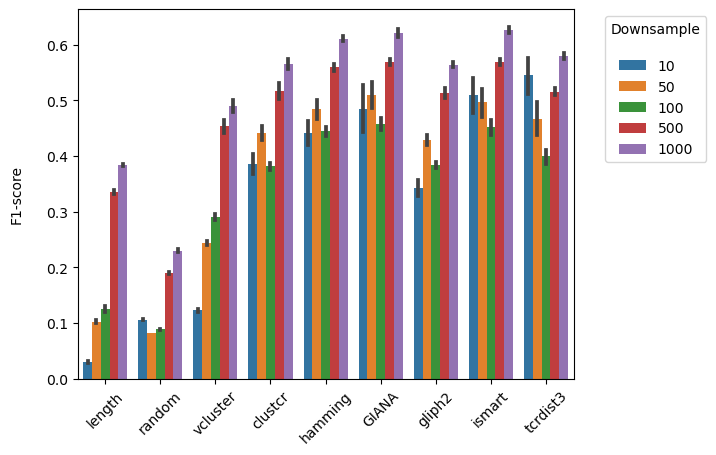

In [198]:
sub = results[results['Experiment']=='Full benchmarking - tcrdist subset']
fig, ax = plt.subplots(1, 1)
sns.barplot(data=sub,
                x='Model',
                y='f1-score',
                hue = 'Downsample',
                ax=ax,
                )    
ax.legend(title='Downsample\n',loc=2, bbox_to_anchor=(1.05, 1))
ax.set_ylabel('F1-score\n')
ax.set_xlabel(None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)
plt.show()

/opt/miniconda3/envs/clustox_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


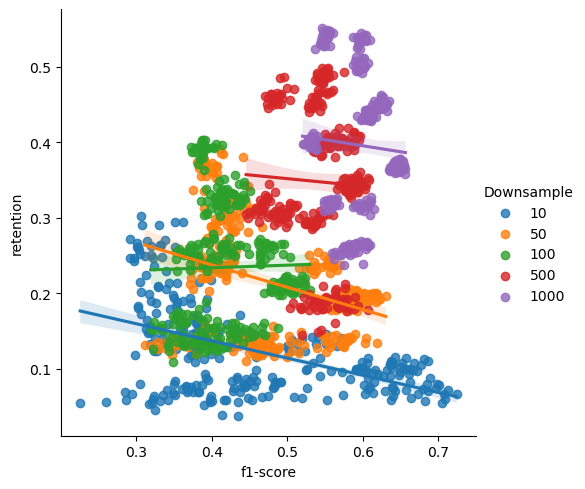

In [118]:
# sub['Model-Downsample']=sub['Model']+'-'+sub['Downsample'].astype(str)

for metric1, metric2 in [
                        #  ('precision', 'f1-score'),
                        #  ('recall', 'f1-score'),
                        #  ('ami','f1-score'),
                        #  ('purity','f1-score'),
                        #  ('consistency','f1-score'),
                         ('retention','f1-score'),
                         ]:
    sub2 =sub[~sub['Model'].isin(['length','random','vcluster'])]
    sns.lmplot(data=sub2,
                    x=metric2,
                    y=metric1,
                    hue = 'Downsample',
                    )
    # sns.lmplot(data=sub2,
    #                 x=metric2,
    #                 y=metric1,
    #                 hue = 'Model',

    #                 )    

    plt.show()
    

In [43]:
parent = 'results_publication2/benchmark2/'
# results = pd.concat([pd.read_csv(os.path.join(parent, file,'stats.csv'), index_col=0) for file in os.listdir(parent) if os.path.isdir(os.path.join(parent, file))])
results=pd.read_csv('results_publication2/benchmark2/20231020_133237/stats.csv')

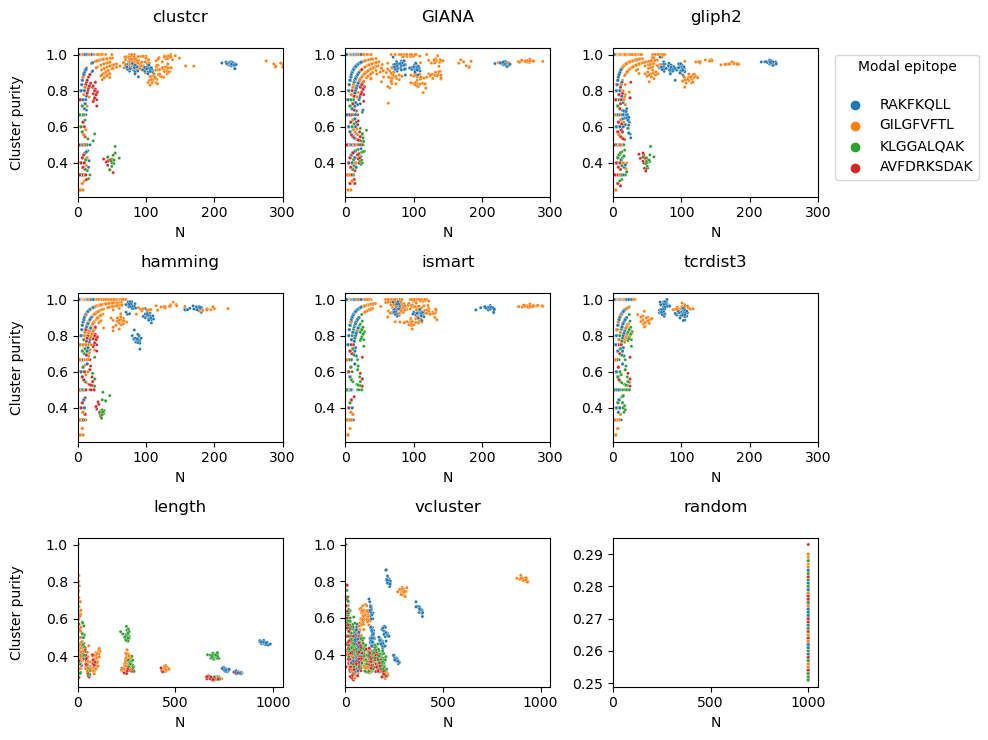

In [63]:
models = ['clustcr', 'GIANA', 'gliph2', 
          'hamming', 'ismart', 'tcrdist3',
          'length', 'vcluster', 'random']

coords = [[0, 0], [0, 1], [0, 2],
          [1, 0], [1, 1], [1, 2],
          [2, 0], [2, 1], [2, 2],
          ]

fig, ax  =plt.subplots(3,3, 
                       figsize = (10,7.5))
for m, model in enumerate(models):
    a, b = coords[m]
    sub=results[results['Model']==model]
    sns.scatterplot(sub, x='N',
                    y = 'purity_frequent', hue = 'most_frequent', ax =ax[a][b],s=5)
    if coords[m]==[0, 2]:
        ax[a][b].legend(title = 'Modal epitope\n',
                        loc=2, 
                        bbox_to_anchor=(1.05, 1))
    else:
        ax[a][b].legend([],[], frameon=False)
    if a < 2:
        ax[a][b].set_xlim(0,300)
    else:
        ax[a][b].set_xlim(0,1050)
    if b>0:
        ax[a][b].set_ylabel(None)
    else:
        ax[a][b].set_ylabel('Cluster purity\n')

    ax[a][b].set_title('%s\n'%(model))
plt.tight_layout()

In [95]:
# t= pd.read_csv('data/combined_deduplicated_clean_ags.csv', index_col=0)
# mira = t[t['dataset']=='MIRA']
# mira=mira[['cdr3.alpha', 'v.alpha_clean_level_3', 'j.alpha_clean_level_3',
#             'cdr3.beta', 'v.beta_clean_level_3', 'j.beta_clean_level_3',
#             'pairing',
#            'length_beta', 'dataset', 'antigen.epitope_clean']].rename(columns={'v.alpha_clean_level_3': 'v.alpha',
#                                                                                'j.alpha_clean_level_3': 'j.alpha',
#                                                                                'v.beta_clean_level_3': 'v.beta',
#                                                                                'j.beta_clean_level_3': 'j.beta',
#                                                                                'antigen.epitope_clean': 'epitope'})
# mira.to_csv('data/mira.csv')

/var/folders/pp/qphvqyn14wl91lgf7368sfmw0000gn/T/ipykernel_2790/2329653745.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,15,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,33,40,41,42,43,44,45,46,47,48,50,53,54,55,56,57,58,59,60,61,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  t= pd.read_csv('data/combined_deduplicated_clean_ags.csv', index_col=0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


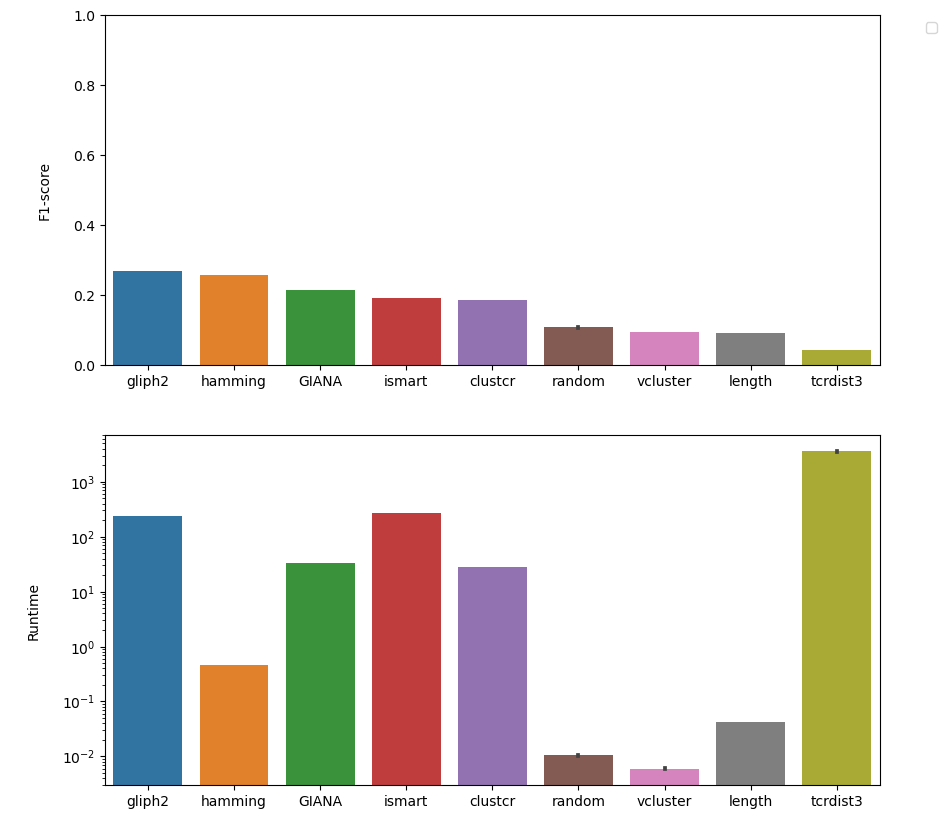

In [15]:
parent = 'results_publication2/MIRA'
results = pd.concat([pd.read_csv(os.path.join(parent, file,'total.csv'), index_col=0) for file in os.listdir(parent) if os.path.isdir(os.path.join(parent, file))])
results['Runtime']=results['Runtime'].apply(literal_eval).apply(lambda x: sum(x) if type(x)==list else x)
# sub=results.copy()
sub=results[results['Downsample']==0]
hue_order = sub.sort_values('f1-score',ascending=False)['Model'].unique()
metrics = [
            'f1-score',
            'Runtime']
# sub=sub.sort_values('f1-score')
fig, ax = plt.subplots(len(metrics),1, figsize = (10, 10))

for m, metric in enumerate(metrics):
    sns.barplot(sub, x = 'Model', y=metric,order=hue_order, ax = ax[m])
    if m==0:
        ax[m].legend(loc=2,bbox_to_anchor=(1.05, 1))
    else:
        ax[m].legend([], [], frameon = False)
    if m ==2:
        ax[m].set_xlabel('\nOOM mode enabled')
    else:
        ax[m].set_xlabel(None)
    ax[m].set_ylabel('\n%s\n'%(metric.capitalize()))
    # ax[m].set_title('\n%s\n'%(metric.capitalize()))
    if metric == 'Runtime':
        ax[m].set_yscale('log')
    else:
        ax[m].set_ylim(0,1)

plt.show()
# sub.to_csv(os.path.join(parent,'mira.csv'))

In [17]:
mira = pd.read_csv('data/mira.csv')

In [22]:
len(mira)

593888

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


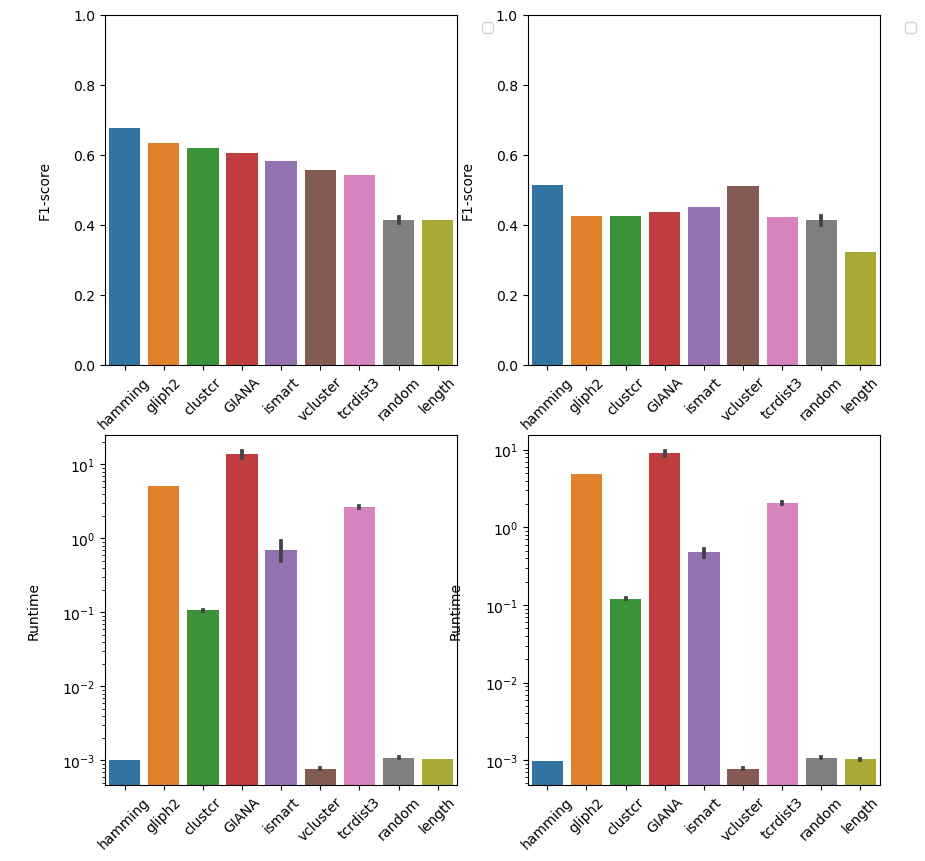

In [5]:

parent = 'results_publication2/McPas'
results = pd.concat([pd.read_csv(os.path.join(parent, file,'total.csv'), index_col=0) for file in os.listdir(parent) if os.path.isdir(os.path.join(parent, file))])
results['Runtime']=results['Runtime'].apply(literal_eval).apply(lambda x: sum(x) if type(x)==list else x)
# sub=results.copy()
sub=results[((results['Downsample']==0)&(results['Paired'].isnull()))]

hue_order = sub.sort_values('f1-score',ascending=False)['Model'].unique()
metrics = [
            'f1-score',
            'Runtime']
# sub=sub.sort_values('f1-score')
fig, ax = plt.subplots(len(metrics),2, figsize = (10, 10),
                       )

for m, metric in enumerate(metrics):
    for c, chain in enumerate(['alpha', 'beta']):
        sns.barplot(sub[sub['Chain']==chain], 
                    x = 'Model', 
                    y=metric,order=hue_order, ax = ax[m][c])
        if m==0:
            ax[m][c].legend(loc=2,bbox_to_anchor=(1.05, 1))
        else:
            ax[m][c].legend([], [], frameon = False)
        if m ==2:
            ax[m][c].set_xlabel('\nOOM mode enabled')
        else:
            ax[m][c].set_xlabel(None)
        ax[m][c].set_xticklabels(ax[m][c].get_xticklabels(), 
                                 rotation=45)
        ax[m][c].set_ylabel('\n%s\n'%(metric.capitalize()))
        # ax[m].set_title('\n%s\n'%(metric.capitalize()))
        if metric == 'Runtime':
            ax[m][c].set_yscale('log')
        else:
            ax[m][c].set_ylim(0,1)

plt.show()
sub.to_csv(os.path.join(parent,'mcpas.csv'))

In [14]:
sub['Downsample'].value_counts()

Downsample
0    160
Name: count, dtype: int64

In [70]:
results['Downsample'].unique()

array([1000,  500])

In [41]:
parent = 'results_publication2/OLGA'
results = pd.concat([pd.read_csv(os.path.join(parent, file,'total.csv'), index_col=0) for file in os.listdir(parent) if os.path.isdir(os.path.join(parent, file))])
results=results[results['Downsample']==1000]
results['Runtime']=results['Runtime'].apply(literal_eval).apply(lambda x: sum(x) if type(x)==list else x)


In [42]:
len(results['Datetime'].unique())

43

In [46]:
pd.DataFrame(results.groupby('N_olga')['Model'].value_counts())

count
N_olga Model          
0      random      360
       clustcr      45
       GIANA        45
       gliph2       45
       hamming      45
...                ...
100000 ismart       18
       hamming      18
       gliph2       18
       clustcr      18
       vcluster     18

[63 rows x 1 columns]

In [99]:
res = pd.DataFrame(results.groupby('N_olga')['Model'].value_counts()).reset_index()
# res[res['N_olga']>=50000]
res

,N_olga,Model,count
0,0,random,360
1,0,clustcr,45
2,0,GIANA,45
3,0,gliph2,45
4,0,hamming,45
...,...,...,...
58,100000,ismart,18
59,100000,hamming,18
60,100000,gliph2,18
61,100000,clustcr,18


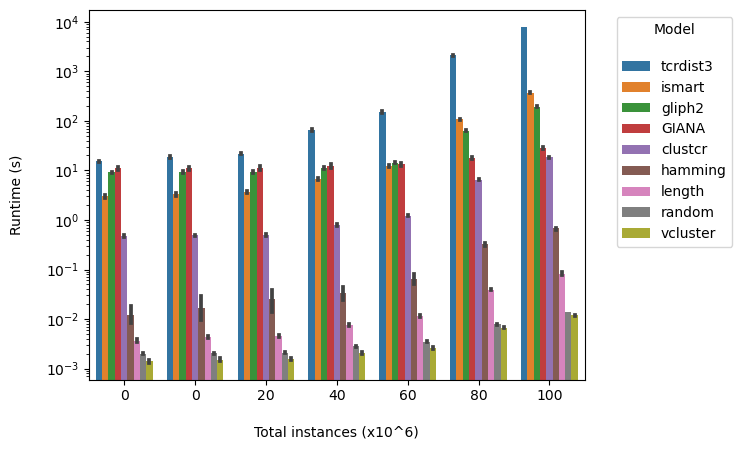

In [101]:
fig, ax = plt.subplots()
hue_order = results.sort_values('Runtime',ascending=False)['Model'].unique()
sns.barplot(results, 
             x='N_total', 
             y='Runtime', 
             hue='Model', 
             hue_order=hue_order,
             ax=ax)
# sns.lineplot(results, 
#              x='N_total', 
#              y='Runtime', 
#              hue='Model', 
#              hue_order=hue_order,
#              ax=ax)
ax.set_ylabel('Runtime (s)\n')
ax.set_xticklabels([0, 0, 20, 40, 60, 80, 100])
ax.set_xlabel("\nTotal instances (x10^6)")
ax.legend(title='Model\n',
          loc=2,
          bbox_to_anchor=(1.05, 1))
plt.yscale('log')

In [36]:
results=results.reset_index(drop=True)

In [38]:
results.to_csv(os.path.join(parent,'results_olga.csv'))

In [39]:
eps = extract_eps(results)

NameError: name 'extract_eps' is not defined

In [23]:
parent = 'results_publication2/Combined'
results = pd.concat([pd.read_csv(os.path.join(parent, file,'total.csv'), index_col=0) for file in os.listdir(parent) if os.path.isdir(os.path.join(parent, file))])

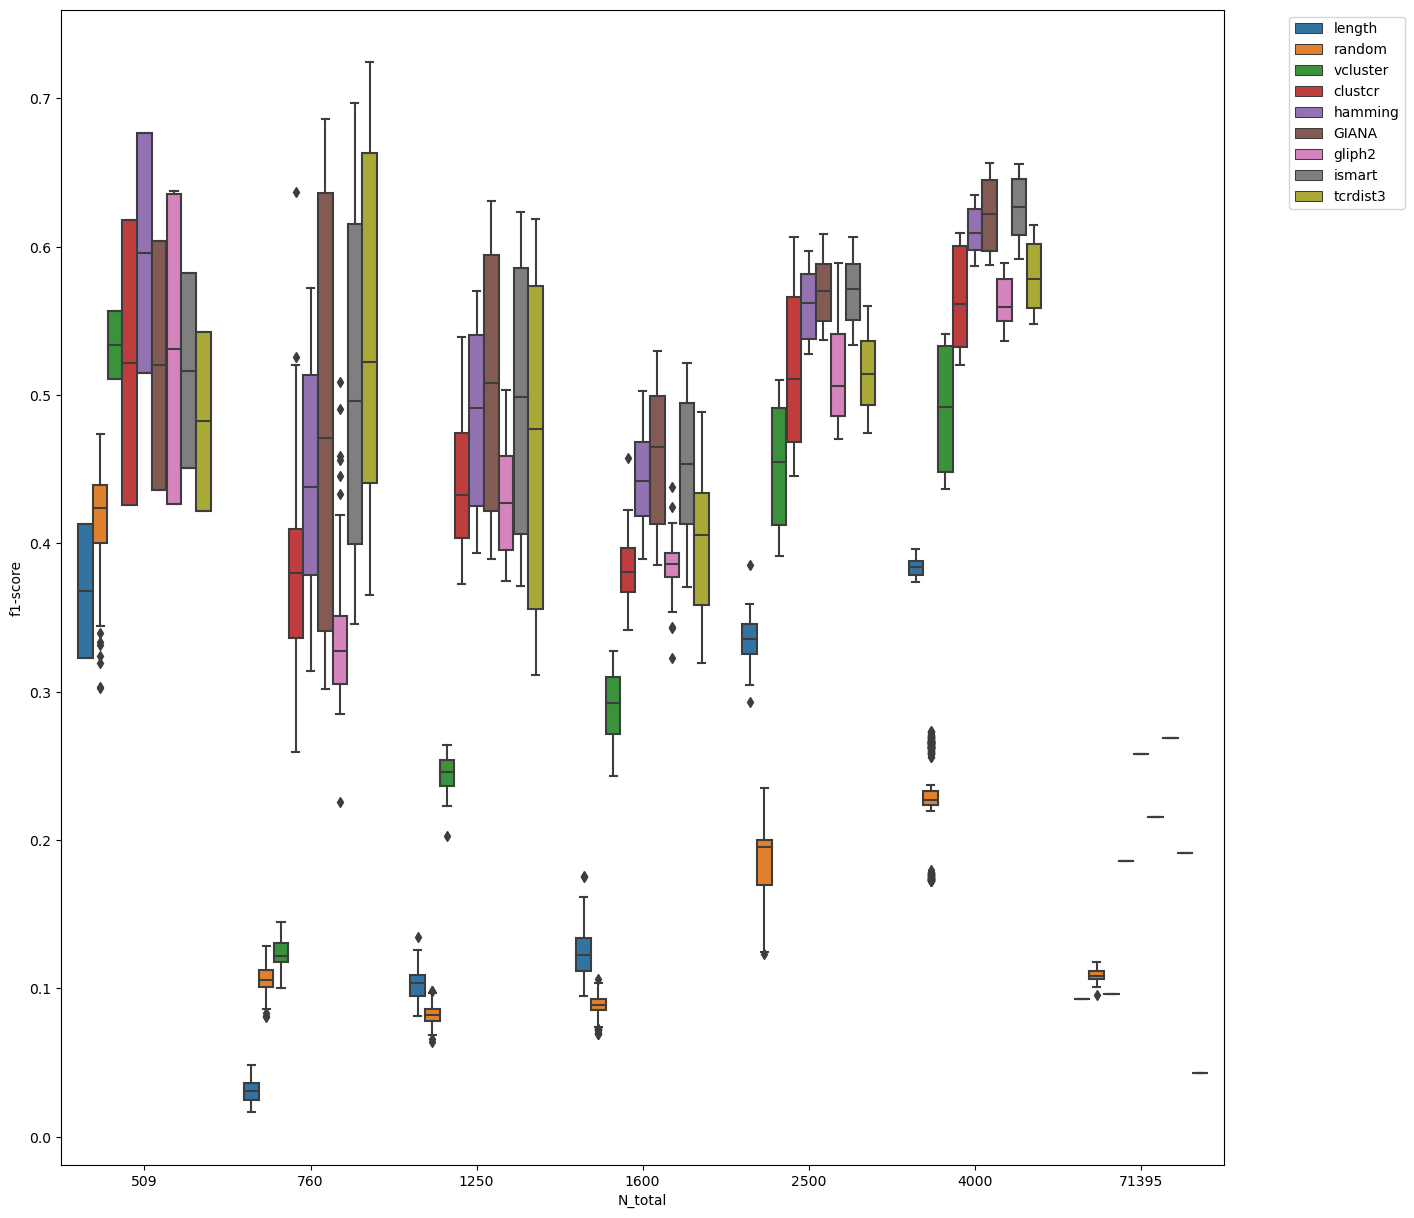

In [33]:
fig, ax = plt.subplots(1,1, figsize = (15,15))
sns.boxplot(results, x='N_total', y= 'f1-score', hue='Model', ax=ax)
ax.legend(loc=2, bbox_to_anchor=(1.05, 1))

In [106]:
eps.to_csv(os.path.join(parent,'results_olga_epitopes.csv'))